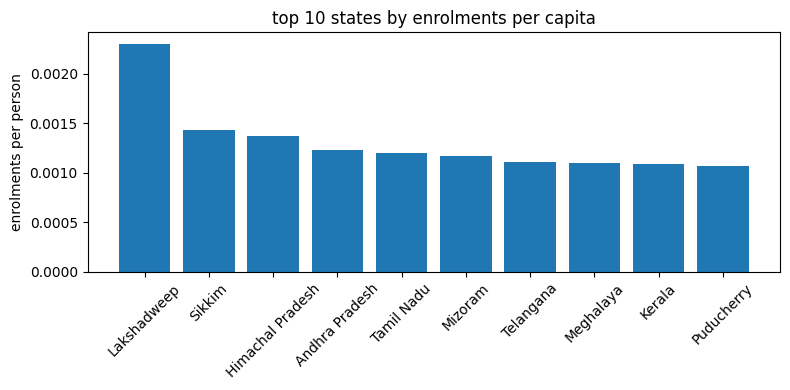

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# enrolments
enrolment=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")
enrol=enrolment.groupby("state").size().reset_index(name="enrolments")

# population
population=pd.read_csv("../sql/data/Population of Indian states 2025.csv")
population=population.rename(columns={"State/UT":"state","Population 2025":"population"})
population["population"]=population["population"].astype(str).str.replace(",","").astype(int)

df=enrol.merge(population,on="state",how="inner")
df["enrolments_per_capita"]=df["enrolments"]/df["population"]

df=df.sort_values("enrolments_per_capita",ascending=False).head(10)

plt.figure(figsize=(8,4))
plt.bar(df["state"],df["enrolments_per_capita"])
plt.xticks(rotation=45)
plt.ylabel("enrolments per person")
plt.title("top 10 states by enrolments per capita")
plt.tight_layout()
plt.show()
